Initial setup

In [1]:
%run "Common setup.ipynb"

In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))
corpora_df = wosis.rc_to_df(RC)

Keyword match OAT in the Filtered Corpora and then plot keyword and publication trend of resutls.

In [3]:
oat = wosis.keyword_matches(RC, ['local sensitivity', 'oat', 'one-at-a-time', 'one-factor-at-a-time'], threshold=95.0)

In [4]:
all_oat = oat.combine_recs()

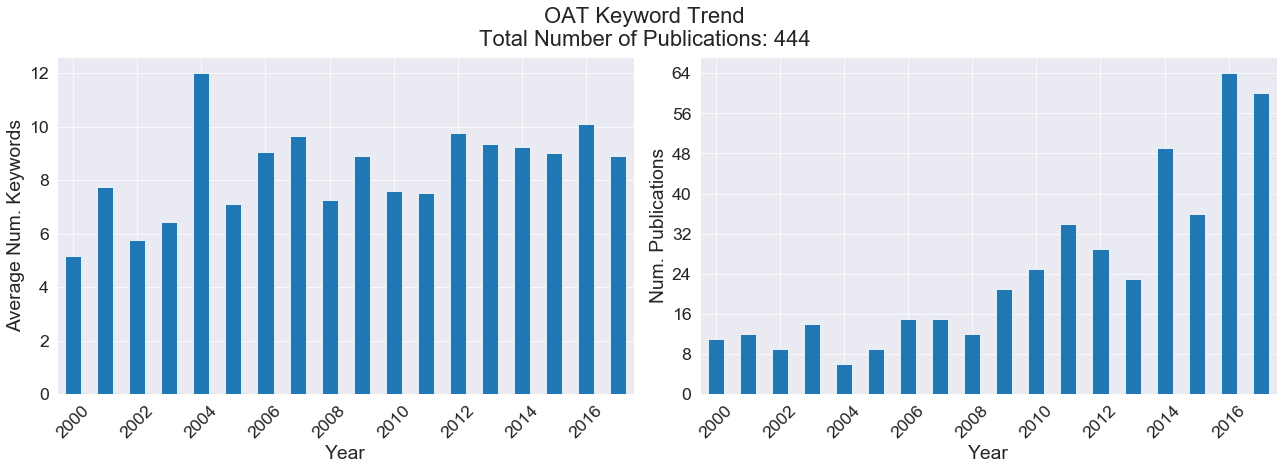

In [5]:
wos_plot.plot_kw_trend(all_oat, title='OAT Keyword Trend')

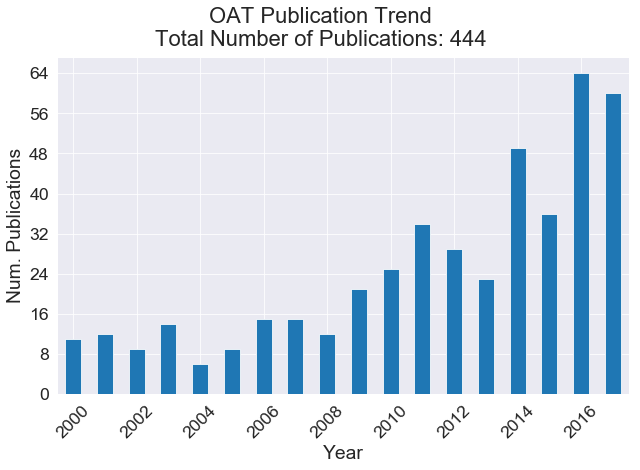

In [6]:
wos_plot.plot_pub_trend(all_oat, title='OAT Publication Trend')

<hr> Running a key-phrase extraction on OAT to identify the fields using this method.

In [7]:
oat_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_oat))

In [8]:
# oat_phrases.display_phrases()

<hr> Criteria matching OAT results to group by field

In [9]:
hydrology = wosis.keyword_matches(all_oat, 
                                  ['hydrolog', 'watershed', 'catchment', 
                                   'water quality', 'groundwater', 'basin', 
                                   'runoff', 'stormwater'], threshold=95.0)

In [10]:
all_hydro = hydrology.combine_recs()

In [11]:
chem = wosis.keyword_matches(all_oat, ['chem', 'chemical engineering'], threshold=95.0)

In [12]:
all_chem = chem.combine_recs()

In [13]:
climate = wosis.keyword_matches(all_oat, ['climate', 'climate change', 'greenhouse'], threshold=95.0)

In [14]:
all_climate = climate.combine_recs()

In [15]:
mechanics = wosis.keyword_matches(all_oat, ['mechanic', 'mechanical engineering'], threshold=95.0)

In [16]:
all_mech = mechanics.combine_recs()

In [17]:
ecology = wosis.keyword_matches(all_oat, ['ecology', 'forest', 'woodland', 'specie'], threshold=95.0)

In [18]:
all_eco = ecology.combine_recs()

In [19]:
risk = wosis.keyword_matches(all_oat, ['risk assessment', 'risk'], threshold=95.0)

In [20]:
all_risk = risk.combine_recs()

In [21]:
tech = wosis.keyword_matches(all_oat, ['tech'], threshold=95.0)

In [22]:
all_tech = tech.combine_recs()

In [23]:
agriculture = wosis.keyword_matches(all_oat, ['agricultur', 'farm'], threshold=95.0)

In [24]:
all_agri = agriculture.combine_recs()

In [25]:
physics = wosis.keyword_matches(all_oat, ['computational physics', 'physics'], threshold=95.0)

In [26]:
all_physics = physics.combine_recs()

In [27]:
comp_sci = wosis.keyword_matches(all_oat, ['computer science', 'computing'], threshold=95.0)

In [28]:
all_comp_sci = comp_sci.combine_recs()

In [29]:
stats = wosis.keyword_matches(all_oat, ['statistics', 'data analysis'], threshold=95.0)

In [30]:
all_stats = stats.combine_recs()

In [31]:
math_model = wosis.keyword_matches(all_oat, ['mathematical model'], threshold=95.0)

In [32]:
all_math = math_model.combine_recs()

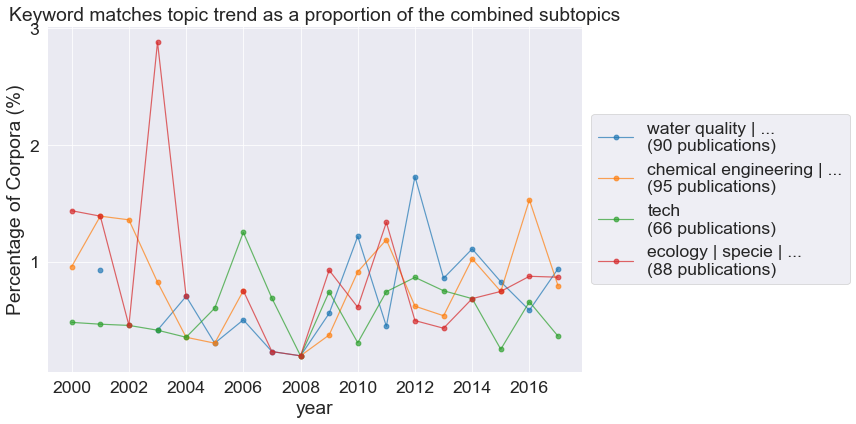

In [33]:
wos_plot.plot_topic_trend([hydrology, chem, tech, ecology], total_rc=RC, 
                          title='Keyword matches topic trend as a proportion of the combined subtopics')

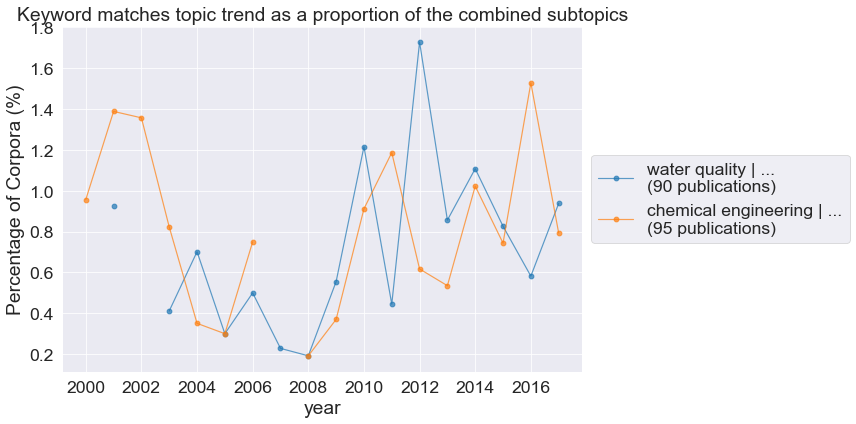

In [34]:
wos_plot.plot_topic_trend([hydrology, chem], total_rc=RC, 
                          title='Keyword matches topic trend as a proportion of the combined subtopics')

<hr> Top-cited journals for OAT

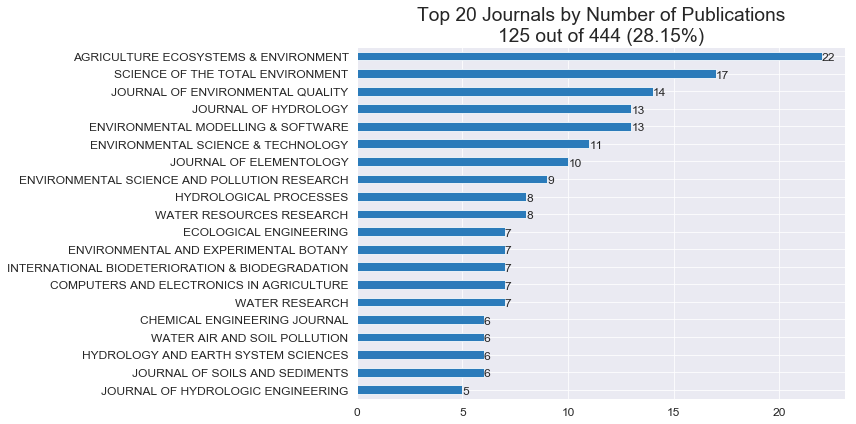

In [35]:
wos_plot.plot_pubs_per_journal(all_oat, top_n=20, annotate=True, show_stats=True)

In [36]:
all_oat.name = 'OAT Publications'

In [37]:
journals_of_interest_oat = list(map(str.upper, ['Environmental Modelling & Software', 
                            'Computer Methods in Applied Mechanics and Engineering', 
                            'Agriculture Ecosystems & Environment', 'Journal of Hydrology', 
                            'Environmental Science & Technology']))

pubs_for_journals_oat = wosis.find_pubs_by_journal(all_oat, journals_of_interest_oat)

In [38]:
# Get citations for each paper
paper_citations_per_journal_oat = {}
for journal in pubs_for_journals_oat:
    fn = '{}/collection_oat_{}_2019-03-15'.format(TMP_DIR, journal)
    paper_citations_per_journal_oat[journal] = wosis.get_num_citations(pubs_for_journals_oat[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

In [39]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_oat = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_oat.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_oat = collection_oat.append(df[cols_of_interest][0:10], ignore_index=True)

In [40]:
top_cited_in_top_journals_oat = collection_oat.sort_values('citations', ascending=False)
# top_cited_in_top_journals_oat.head(10)

In [41]:
top_cited_in_top_journals_oat.to_csv('{}/top_cited_oat2_papers.csv'.format(DATA_DIR))

<hr> Topic trend

In [42]:
all_oat.name = 'OAT'

In [43]:
# oat_topics = wosis.find_topics(all_oat, cache_as='{}/oat_topics'.format(TMP_DIR))
# oat_uasa = list(map(oat_topics.get_topic_by_id, [1, 10]))
# model_sensi = oat_uasa[0]
# oat_sensi_RC = wosis.extract_recs(model_sensi.id, RC)
# oat_phrases = wosis.find_phrases(oat_sensi_RC)
# oat_phrases.display_phrases()

No handles with labels found to put in legend.


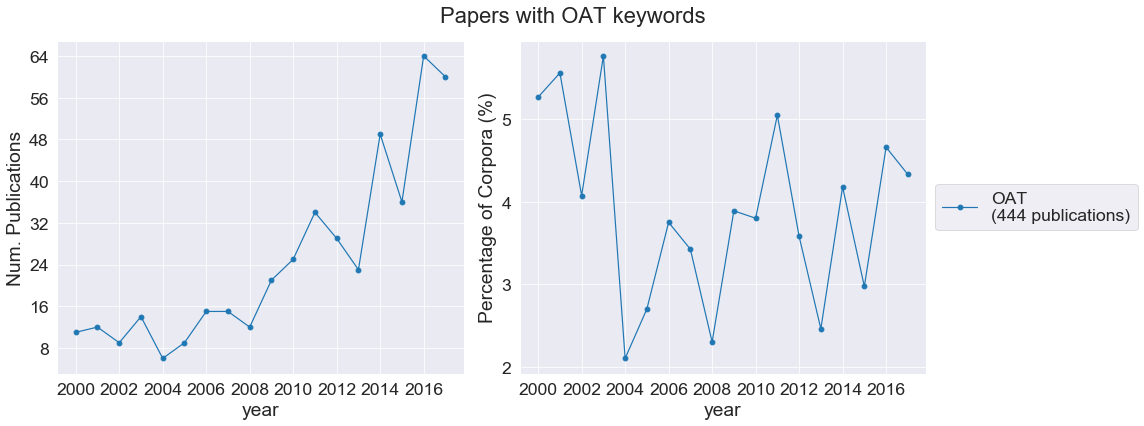

In [44]:
# Manually creating combined plots

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

wos_plot.plot_topic_trend([all_oat], 
                          title='', 
                          ax=ax1
                          )


wos_plot.plot_topic_trend([all_oat], 
                          total_rc=RC,
                          title='', 
                          ax=ax2
                         )

plt.suptitle('Papers with OAT keywords',
             fontsize=22)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.savefig(FIG_DIR+'/Figure_10_OAT_publications.png')

In [45]:
# wos_plot.plot_topic_trend([all_oat], title='Num. papers with OAT keywords', 
#                           save_plot_fn='{}/Figure_10a.png'.format(FIG_DIR))


# wos_plot.plot_topic_trend([all_oat], total_rc=RC, 
#                           title='Papers with OAT keywords\n(Perc. of Filtered Corpora)', 
#                           save_plot_fn='{}/Figure_10b.png'.format(FIG_DIR))

In [46]:
matching_pubs = wosis.find_pubs_by_title(RC, ("How to avoid a perfunctory sensitivity analysis"))
s_and_a_2010_wos_id = wosis.rc_to_df(matching_pubs).id[0]

citing_works = wosis.get_citing_works(s_and_a_2010_wos_id, WOS_CONFIG, cache_as="{}/sanda_citing_works".format(TMP_DIR))

matches = wosis.find_keywords(citing_works, ["global sensitivity", "GSA", "sensitivity analysis"])
len(matches)

Authenticated (SID: 7AodPqVwP8VVdMNoaUw)
Found 392 records


308

In [47]:
matches = citing_works.yearSplit(0, 2017)
matches.name = 'GSA papers citing\nSaltelli & Annoni (2010)'

In [48]:
# # Manually creating combined plots
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

# wos_plot.plot_topic_trend([matches, all_oat], 
#                           title="",
#                           ax=ax1
#                          )

# wos_plot.plot_topic_trend([matches, all_oat], 
#                           title="",
#                           total_rc=RC,
#                           ax=ax2
#                          )

# plt.suptitle('Influence of Saltelli & Annoni (2010)',
#              fontsize=22)

# plt.tight_layout()
# plt.subplots_adjust(top=0.90)
# plt.savefig(FIG_DIR+'/Figure_12_influence_of_sanda.png')

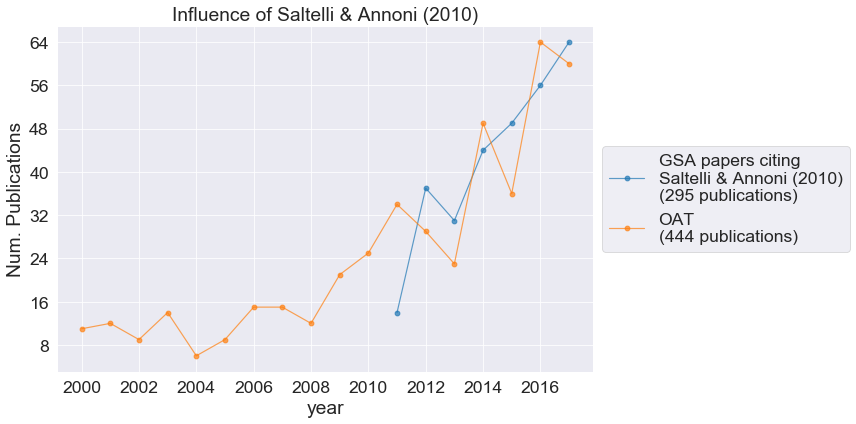

In [49]:
wos_plot.plot_topic_trend([matches, all_oat], title="Influence of Saltelli & Annoni (2010)",
                          save_plot_fn=FIG_DIR+'/Figure_12_influence_of_sanda.png')

In [50]:
sanda_phrases = wosis.find_phrases(matches)

In [51]:
sanda_phrases.all_phrases.to_csv('{}/sanda_phrases.csv'.format(DATA_DIR))